# Chemical Synapse Model

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

## Constants

In [121]:
S_0 = 1_000  # initial number of molecules
S_MAX = 100_000  # maximum number of molecules
V_DEG = 100  # molecules/ms
V_UPTAKE = 1_000  # molecules/ms
U_0 = -70  # mV
U_SPIKE = 30  # mV
U_R2 = 0.05  # mV/ms
U_R3 = 0.10  # mV/ms
U_R4 = 0.13  # mV/ms
P_R2 = 0.60
P_R3 = 0.71
P_R4 = 0.97
R = 1_500  # total number of receptors
T = 10_000  # ms
STEP = 5  # ms

## Plots

In [174]:
def plot_data(data):
    time = list(range(0, T, STEP))
    plt.figure(figsize=(15, 15))

    plt.subplot(6, 1, 1)
    plt.xlabel('time (ms)')
    plt.ylabel('number of molecules')
    plt.plot(time, data['s'])

    plt.subplot(6, 1, 2)
    plt.xlabel('time (ms)')
    plt.ylabel('u (mV)')
    plt.plot(time, data['u'])
    plt.plot(time, [U_SPIKE] * len(time))
    plt.legend(['potential', '30 mV'])

    plt.subplot(6, 1, 3)
    plt.xlabel('time (ms)')
    plt.ylabel('Q_R2')
    plt.plot(time, data['q_r2'])

    plt.subplot(6, 1, 4)
    plt.xlabel('time (ms)')
    plt.ylabel('Q_R3')
    plt.plot(time, data['q_r3'])

    plt.subplot(6, 1, 5)
    plt.xlabel('time (ms)')
    plt.ylabel('Q_R4')
    plt.plot(time, data['q_r4'])

    plt.subplot(6, 1, 6)
    plt.xlabel('time (ms)')
    plt.ylabel('activation')
    plt.plot(time, data['activation'])

## Model

In [177]:
def get_next_step(v_rel, x, y, z, u, t):
    s_t = S_0 + (v_rel - V_DEG - V_UPTAKE) * t
    s_t = max(0, min(s_t, S_MAX))
    
    assert x + y + z == R
    
    p_r2_t = s_t * P_R2 / S_MAX
    q_r2_t = np.random.binomial(x, p_r2_t)
    
    p_r3_t = s_t * P_R3 / S_MAX
    q_r3_t = np.random.binomial(y, p_r3_t)
    
    p_r4_t = s_t * P_R4 / S_MAX
    q_r4_t = np.random.binomial(z, p_r4_t)
    
    u_t = u + STEP * (U_R2 * q_r2_t + U_R3 * q_r3_t + U_R4 * q_r4_t)
    
    return {
        's': s_t, 
        'q_r2': q_r2_t, 
        'q_r3': q_r3_t, 
        'q_r4': q_r4_t, 
        'u': u_t
    }


def simulate(v_rel, x, y, z, max_t):
    u = U_0
    data = defaultdict(list)

    for t in range(0, max_t, STEP):
        values = get_next_step(v_rel, x, y, z, u, t)
    
        for key in values:
            data[key].append(values[key])
            
        if values['u'] >= U_SPIKE:
            data['activation'].append(1)
            u = U_0
        else:
            data['activation'].append(0)
            u = values['u']
    
    return data


def get_max_sequential_count(activation):
    result = 0
    current = 0
    
    for it in activation:
        if it == 1:
            current += 1
            result = max(result, current)
        else:
            current = 0
    
    return result

## Experiments

### Constant number of molecules and only X receptors

Max number of sequential spikes: 1


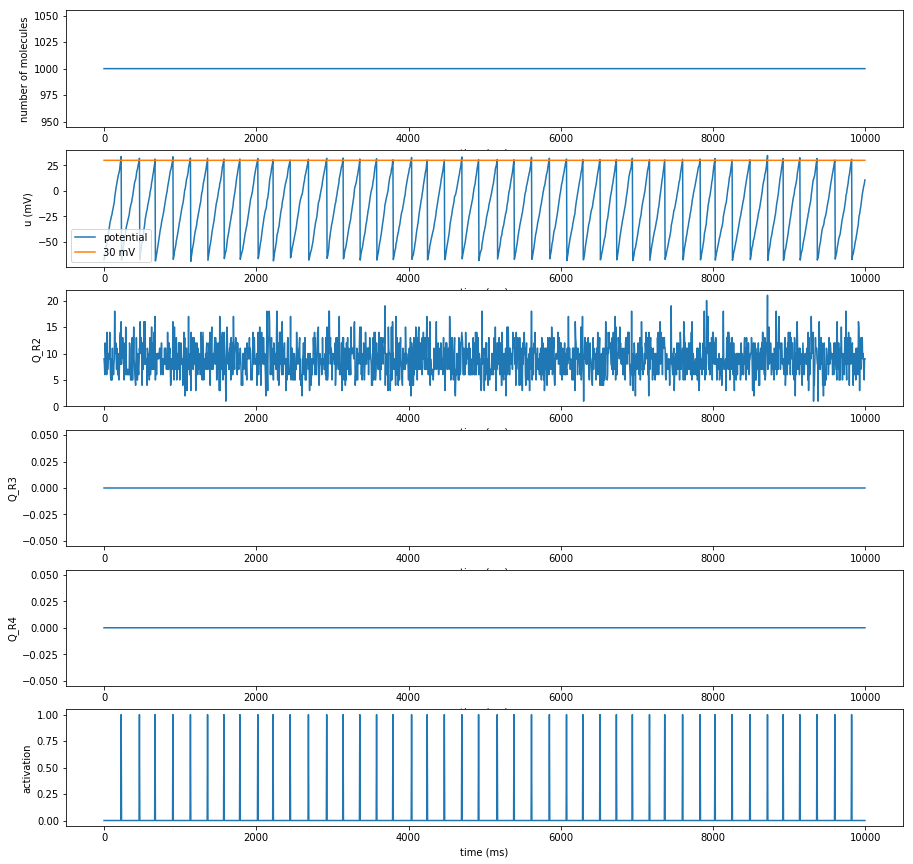

In [186]:
data = simulate(v_rel=1100, x=1500, y=0, z=0, max_t=T)
seq_count = get_max_sequential_count(data['activation'])
print(f'Max number of sequential spikes: {seq_count}')
plot_data(data)

### Constant number of molecules and only Z receptors

Max number of sequential spikes: 1


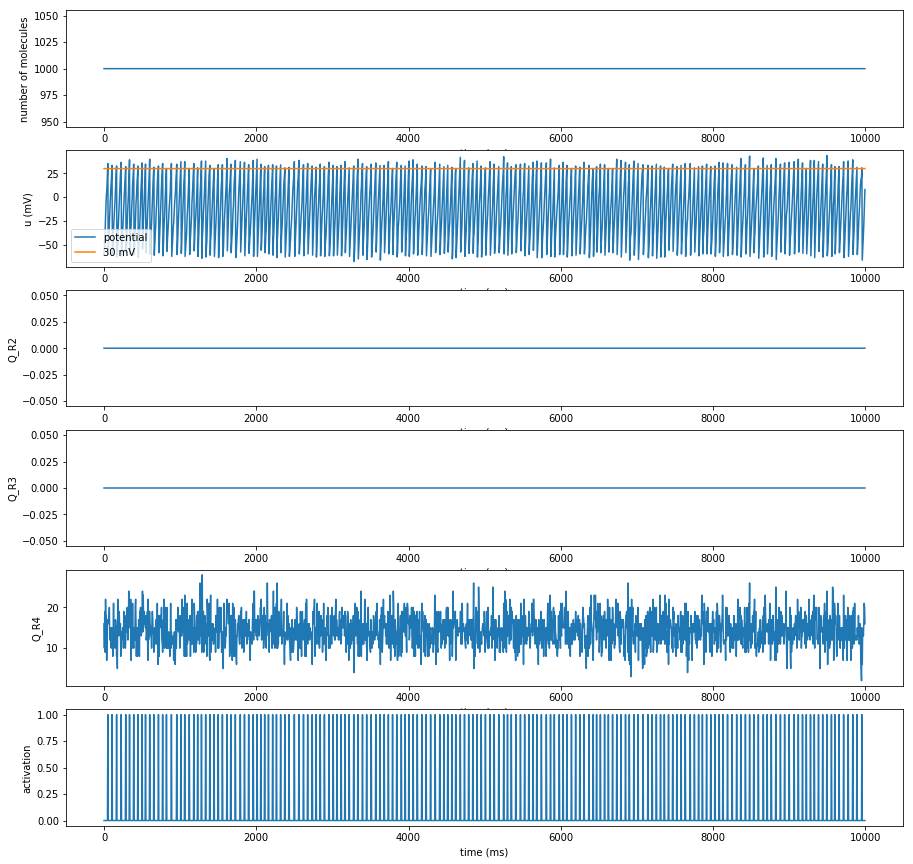

In [188]:
data = simulate(v_rel=1100, x=0, y=0, z=1500, max_t=T)
seq_count = get_max_sequential_count(data['activation'])
print(f'Max number of sequential spikes: {seq_count}')
plot_data(data)

### Increasing number of molecules and only Z receptors

Max number of sequential spikes: 11


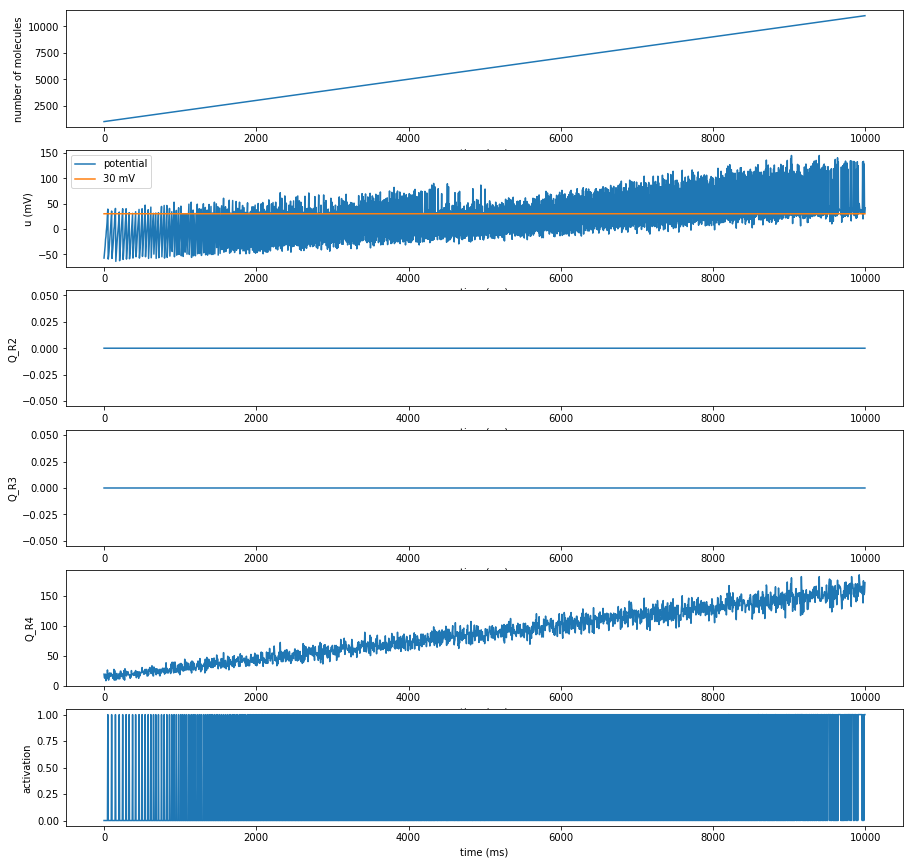

In [214]:
data = simulate(v_rel=1101, x=0, y=0, z=1500, max_t=T)
seq_count = get_max_sequential_count(data['activation'])
print(f'Max number of sequential spikes: {seq_count}')
plot_data(data)

### Increasing number of molecules and all receptors

Max number of sequential spikes: 111


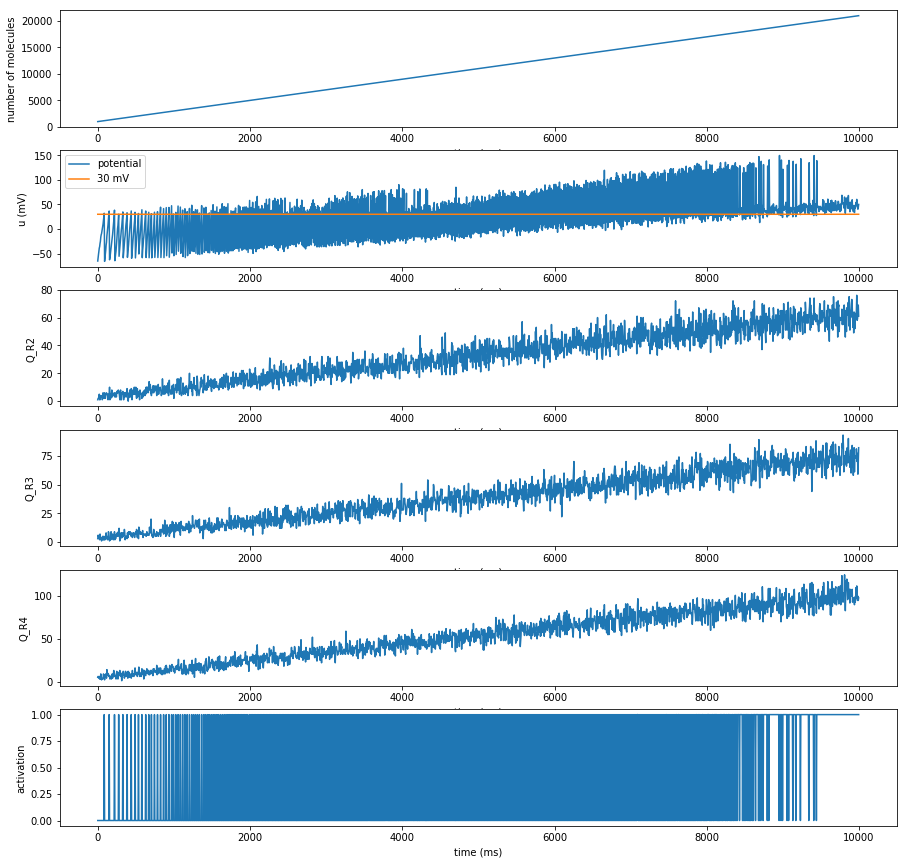

In [227]:
data = simulate(v_rel=1102, x=500, y=500, z=500, max_t=T)
seq_count = get_max_sequential_count(data['activation'])
print(f'Max number of sequential spikes: {seq_count}')
plot_data(data)